# 演示单通道DAC,ADC和混频器使用
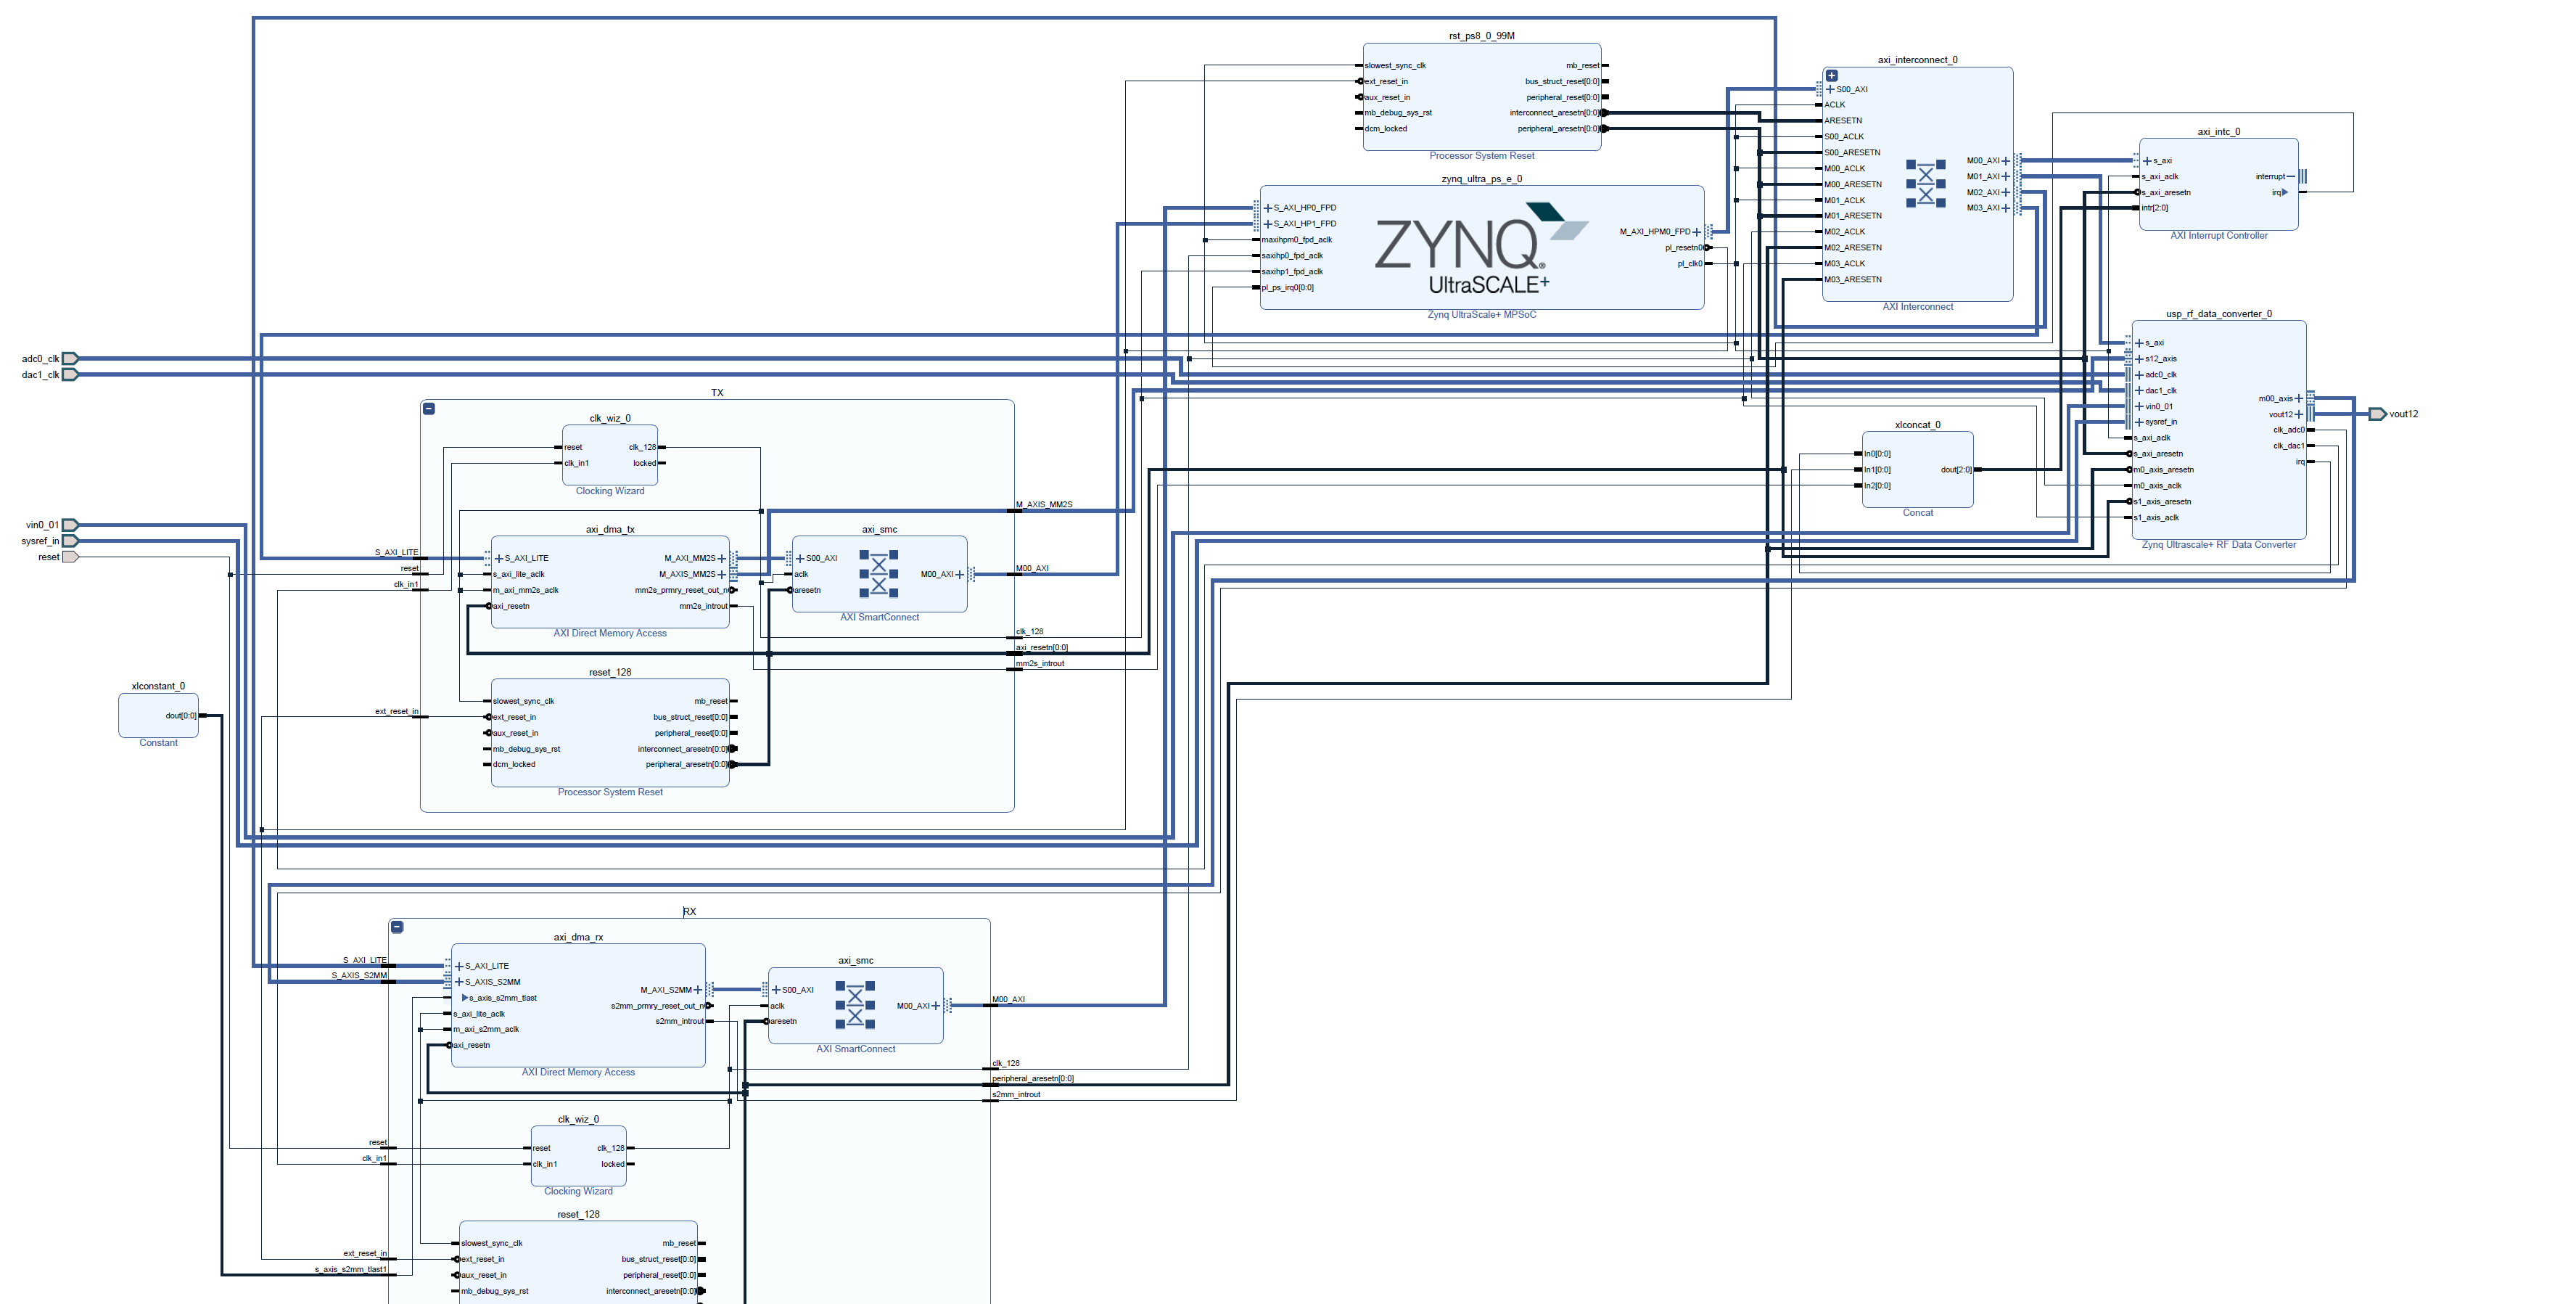

In [1]:
from pynq import allocate
from pynq import Overlay
import numpy as np
import random

import xrfclk
import xrfdc

xrfclk.set_all_ref_clks(409.6)

overlay = Overlay('/home/xilinx/pynq/overlays/full/full.bit')

In [2]:
#DMA TX
dma_read = overlay.TX.axi_dma_tx

dac_tile = overlay.usp_rf_data_converter_0.dac_tiles[1]
dac_tile.DynamicPLLConfig(1, 409.6, 1228.8)

dac_block = dac_tile.blocks[2]

event = xrfdc.EVNT_SRC_TILE
dac_block.MixerSettings['Freq'] = 900
dac_block.MixerSettings['PhaseOffset'] = 0.0
dac_block.MixerSettings['EventSource'] = event
dac_block.UpdateEvent(event)

dac_tile.SetupFIFO(True)

dac_block.MixerSettings

{'CoarseMixFreq': 16,
 'EventSource': 2,
 'FineMixerScale': 0,
 'Freq': 900.0,
 'MixerMode': 1,
 'MixerType': 1,
 'PhaseOffset': 0.0}

In [3]:
#DMA RX
dma_write = overlay.RX.axi_dma_rx

adc_tile = overlay.usp_rf_data_converter_0.adc_tiles[0]
adc_tile.DynamicPLLConfig(1, 409.6, 1228.8)

adc_block = adc_tile.blocks[0]

event = xrfdc.EVNT_SRC_TILE
adc_block.MixerSettings['Freq'] = 900
adc_block.MixerSettings['PhaseOffset'] = 0.0
adc_block.MixerSettings['EventSource'] = event
adc_block.UpdateEvent(event)

adc_tile.SetupFIFO(True)

adc_block.MixerSettings

{'CoarseMixFreq': 16,
 'EventSource': 2,
 'FineMixerScale': 0,
 'Freq': 900.0,
 'MixerMode': 1,
 'MixerType': 1,
 'PhaseOffset': 0.0}

In [4]:
buffer_length = np.power(2,20)

input_buffer = allocate(shape=(buffer_length,), dtype= np.float64)
output_buffer = allocate(shape=(buffer_length,), dtype= np.float64)

In [5]:
for i in range(buffer_length):
   input_buffer[i] = random.random()*100

input_buffer

PynqBuffer([ 12.36255751,  14.11770425,  35.22684284, ...,   0.41664748,
              6.82050815,  90.61916154])

In [6]:
dma_read.sendchannel.transfer(input_buffer)
dma_write.recvchannel.transfer(output_buffer)
dma_read.sendchannel.wait()
dma_write.recvchannel.wait()

output_buffer

PynqBuffer([ 0.,  0.,  0., ...,  0.,  0.,  0.])